# Introduction to Data Science – Homework 6
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 23, 11:59pm.

In Part 1 of this homework you will scrape github repositories and organize the information in a Pandas dataframe. In Part 2, you will use linear regression to gain meaningful insights. 

## Your Data
First Name: Brooke
<br>
Last Name: Stanislawski
<br>
E-mail: brooke.stanislawski@utah.edu
<br>
UID: u1142223
<br>

In [66]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import requests
import urllib.request
import time

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

### 1. Scrape Github Repository List and Repository Information using BeautifulSoup
In this part you will explore over 2 million Github repositories. You are going to scrape [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms and services or similar pages of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your Interpretation:**
The terms of service on github.com contain a section on Scraping that explains that researchers may scrape public information from GitHub for research purposes only.  I believe an academic assignment falls under this category as we are not scraping info for any commercial reasons.  We are also not scraping for spamming purposes, which is not allowed in the terms.

### Task 1.2 Download the website

Download the **first ten** pages of the list of highly starred repositories here: 

https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories

To avoid sending too many requests to the server, make sure that your querying code is in a sperate cell from anything else, so that you don't have to re-run it needlessly. 

**Warning:** while we haven't experienced any problems, exepct that github will temporarily block access if you scrape their website relentlessly. Make sure to be responsible. Also, don't do this last minute – if you're blocked for e.g., 24 hours that could impact your timeline.

Now read the html text in python and create a soup object.

In [71]:
## Your code goes here

# download the fist ten pages

#for i in np.arange(1,11):
for i in np.arange(1,11):

    url = "https://github.com/search?o=desc&p="+str(i)+"&q=stars%3A%3E1&s=stars&type=Repositories"

    with urllib.request.urlopen(url) as response:
        html = response.read()
        html = html.decode('utf-8')
        
    time.sleep(10) #sleeps after every 5 request

    #A simple solution is to just use ‘response.text’ to get html returned by requests.get(url) directly. This doesn't work on Windows.
    # html = requests.get(url)
    # html = html.text

    # # save the file
    filename = "repos"+str(i)+".html"
    with open(filename, 'w') as new_file:
        new_file.write(str(html.replace('\n','').encode('utf-8')))
    
    # create one massive soup
    if i == 1:
        git_soup = BeautifulSoup(html, 'html.parser') # initialize git_soup w/ first page
    else:
        cup_soup = BeautifulSoup(html, 'html.parser') # soup for each page
        for element in cup_soup:
            git_soup.body.append(element) # massive soup that contains soups of all pages
    
        

1
2
3
4
5
6
7
8
9
10


In [72]:
# Creating the soup
# massive soup that contains soups of all pages was created in for loop above
git_soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://assets-cdn.github.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/frameworks-7a12427f1445.css" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/github-fca0cb55603c.css" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/site-e1e1bc98a53e.css" media="all" rel="stylesheet">
<meta content="width=device-width" name="vi

### 1.3. Extract Data

Extract the foolowing data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

1. Name of the repository
+ URL of the repository 
+ Number of Contributors 
+ Programming Language Used 
+ Number of stars 
+ Number of issues
+ Number of files 
+ Length of readme file.

Note that you will frist have to extract links from the soup that you just scraped earlier, and then download the repository pages to retreive most of the data. 

Refer to lecture 12 for details on how to do this. Make sure to use the web inspector to identify the relevant structures. 

Save the dataframe you created to a new file `project_info.csv` and include this in your submission.

In [73]:
## Your code goes here

name_list = [] # initialize lists
url_list = [] 
cont_list = [] 
lang_list = [] 
stars_list = []
issues_list = []
forks_list = []
rmlength_list = []

repos = git_soup.find_all("div",class_="col-8 pr-3")
repos_lang = git_soup.find_all("div",class_="d-table-cell col-2 text-gray pt-2")
url = "https://github.com"

for i in range(100):
    name_list.append(repos[i].find("a",class_="v-align-middle").text)
    print(repos[i].find("a",class_="v-align-middle").text)
    url_tail = repos[i].find("a").get("href")
    repo_url = url + url_tail
    url_list.append(repo_url)
    with urllib.request.urlopen(repo_url) as response:
        repo_html = response.read()
        repo_html = repo_html.decode('utf-8')
    # if i%5==0:
    #     time.sleep(5) #sleeps after every 5 request
    #     # adjust frequency or time for sleeping if have issues
    with open('repo.html', 'w') as new_file:
        new_file.write(str(repo_html.replace('\n','').encode('utf-8')))
    repo_soup = BeautifulSoup(repo_html, 'html.parser')
    cont_list.append(repo_soup.find("a", href= lambda x : x and "contributors" in x).text.replace('\n','').strip('contributors').strip())
    lang_list.append(repos_lang[i].text.strip())
    stars_list.append(repo_soup.find("a",class_="social-count js-social-count").text.strip())
    issues_list.append(repo_soup.find("span",class_="Counter").text)
    forks_list.append(repo_soup.find("a", href= lambda x : x and "network" in x).text.strip())
    rmlength_list.append(len(repo_soup.find("div",id="readme").text.replace("\n","")))
    
# print('names:',name_list,'\n')
# print('URLs:',url_list,'\n')
# print('cont_list:',cont_list,'\n')
# print('lang_list:',lang_list,'\n')
# print('# of stars:',stars_list,'\n')
# print('# of issues:',issues_list,'\n')
# print('# of forks:',forks_list,'\n')
# print('RM lengths:',rmlength_list,'\n')


robbyrussell/oh-my-zsh
7298
github/gitignore
3268
facebook/react-native
4030
jwasham/coding-interview-university
66821
angular/angular.js
5194
electron/electron
2744
torvalds/linux
720
FortAwesome/Font-Awesome
3595
daneden/animate.css
6045
jquery/jquery
10896
moby/moby
3120
vinta/awesome-python
53850
nodejs/node
17679
Microsoft/vscode
1777
facebook/create-react-app
7160
atom/atom
2629
apple/swift
9292
kamranahmedse/developer-roadmap
1782
laravel/laravel
1938
h5bp/html5-boilerplate
2495
Semantic-Org/Semantic-UI
4036
mrdoob/three.js
1488
socketio/socket.io
5118
meteor/meteor
1268
hakimel/reveal.js
44439
rails/rails
3827
reactjs/redux
10194
golang/go
1357
webpack/webpack
10457
expressjs/express
2297
axios/axios
16134
nodejs/node-v0.x-archive
450
moment/moment
1541
chartjs/Chart.js
1775
resume/resume.github.com
525
rg3/youtube-dl
80097
jakubroztocil/httpie
35278
nvbn/thefuck
16932
jlevy/the-art-of-command-line
32356
toddmotto/public-apis
35293
google/material-design-icons
1477
angular/angu

In [119]:
# Convert list into DataFrame
reposDF = pd.DataFrame({"Repository Names":name_list,
                       "URLs":url_list,
                       "Contributors":cont_list,
                       "Language":lang_list,
                       "Stars":stars_list,
                       "Issues":issues_list,
                       "Forks":forks_list,
                       "ReadMeLength":rmlength_list})

reposDF


,Contributors,Forks,Issues,Language,ReadMeLength,Repository Names,Stars,URLs
0,"1,090","14,105",533,Shell,7298,robbyrussell/oh-my-zsh,"66,255",https://github.com/robbyrussell/oh-my-zsh
1,919,"28,053",169,,3268,github/gitignore,"61,867",https://github.com/github/gitignore
2,"1,609","13,832",563,JavaScript,4030,facebook/react-native,"60,193",https://github.com/facebook/react-native
3,104,"15,717",26,,66821,jwasham/coding-interview-university,"58,105",https://github.com/jwasham/coding-interview-un...
4,"1,604","28,805",502,JavaScript,5194,angular/angular.js,"58,049",https://github.com/angular/angular.js
5,732,"7,427",844,C++,2744,electron/electron,"56,961",https://github.com/electron/electron
6,∞,"20,509",195,C,720,torvalds/linux,"55,621",https://github.com/torvalds/linux
7,2,"9,530","4,387",CSS,3595,FortAwesome/Font-Awesome,"55,043",https://github.com/FortAwesome/Font-Awesome
8,84,"10,672",7,CSS,6045,daneden/animate.css,"49,366",https://github.com/daneden/animate.css
9,272,"14,427",71,JavaScript,10896,jquery/jquery,"48,115",https://github.com/jquery/jquery


In [196]:
reposDF.tail(12)

,Contributors,Forks,Issues,Language,ReadMeLength,Repository Names,Stars,URLs
88,"2,018","4,743","3,311",Rust,6281,rust-lang/rust,"26,638",https://github.com/rust-lang/rust
89,11,"4,456",177,JavaScript,10618,adam-p/markdown-here,"26,519",https://github.com/adam-p/markdown-here
90,731,"13,487",166,JavaScript,2758,freeCodeCamp/freeCodeCamp,"291,631",https://github.com/freeCodeCamp/freeCodeCamp
91,983,"57,749",323,CSS,4908,twbs/bootstrap,"122,126",https://github.com/twbs/bootstrap
92,981,"25,834",17,,1512,EbookFoundation/free-programming-books,"101,632",https://github.com/EbookFoundation/free-progra...
93,"1,344","58,530","1,186",C++,2981,tensorflow/tensorflow,"90,139",https://github.com/tensorflow/tensorflow
94,"1,167","16,835",330,JavaScript,3263,facebook/react,"88,961",https://github.com/facebook/react
95,168,"12,393",99,JavaScript,2604,vuejs/vue,"84,588",https://github.com/vuejs/vue
96,324,"10,320",38,,12280,sindresorhus/awesome,"78,728",https://github.com/sindresorhus/awesome
97,159,"13,777",111,,2628,getify/You-Dont-Know-JS,"76,264",https://github.com/getify/You-Dont-Know-JS


In [136]:
# Save dataframe to file project_info.csv
reposDF.to_csv('project_info.csv', encoding='utf-8')

### 2. Use linear regression to analyze the Github repository data

In this part, you will analyze the data collectd in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the project_info.csv file in again. **We need you to do this so that we can run your code below withouth having to run your scraping code.**

In [178]:
# this loads the data from the project_info.csv file 
project_info1 = pd.read_csv('project_info.csv')
# get rid of index column
project_info = project_info1[['Repository Names','Contributors','Forks','Issues','Language','ReadMeLength','Stars','URLs']]
project_info = project_info.set_index('Repository Names')
project_info.head()

,Contributors,Forks,Issues,Language,ReadMeLength,Stars,URLs
Repository Names,,,,,,,
robbyrussell/oh-my-zsh,"1,090","14,105",533,Shell,7298,"66,255",https://github.com/robbyrussell/oh-my-zsh
github/gitignore,919,"28,053",169,NaN,3268,"61,867",https://github.com/github/gitignore
facebook/react-native,"1,609","13,832",563,JavaScript,4030,"60,193",https://github.com/facebook/react-native
jwasham/coding-interview-university,104,"15,717",26,NaN,66821,"58,105",https://github.com/jwasham/coding-interview-un...
angular/angular.js,"1,604","28,805",502,JavaScript,5194,"58,049",https://github.com/angular/angular.js


### 2.1. Reformat the data into useful datatypes

1. Print the data types for the columns of your dataframe
+ Reformat the colums Issues, Forks, Stars, and Contributers to be integer data
+ There is one repository flagged as having infinite contributers (the Linux kernel). We'll assume that it in fact has 15000 contributors (about twice as much as the next project). 

In [179]:
# your code goes here
print('Pre- data types: \n',project_info.info(),'\n')
project_info['Issues'] = project_info['Issues'].astype(str).str.replace(',','').astype(int)
project_info['Forks'] = project_info['Forks'].astype(str).str.replace(',','').astype(int)
project_info['Stars'] = project_info['Stars'].astype(str).str.replace(',','').astype(int)
project_info.loc['torvalds/linux','Contributors'] = 15000
project_info['Contributors'] = project_info['Contributors'].astype(str).str.replace(',','').astype(int)
print('Post- data types: \n',project_info.info())

project_info.head(12)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, robbyrussell/oh-my-zsh to airbnb/javascript
Data columns (total 7 columns):
Contributors    100 non-null object
Forks           100 non-null object
Issues          100 non-null object
Language        86 non-null object
ReadMeLength    100 non-null int64
Stars           100 non-null object
URLs            100 non-null object
dtypes: int64(1), object(6)
memory usage: 6.2+ KB
Pre- data types: 
 None 

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, robbyrussell/oh-my-zsh to airbnb/javascript
Data columns (total 7 columns):
Contributors    100 non-null int32
Forks           100 non-null int32
Issues          100 non-null int32
Language        86 non-null object
ReadMeLength    100 non-null int64
Stars           100 non-null int32
URLs            100 non-null object
dtypes: int32(4), int64(1), object(2)
memory usage: 9.7+ KB
Post- data types: 
 None


,Contributors,Forks,Issues,Language,ReadMeLength,Stars,URLs
Repository Names,,,,,,,
robbyrussell/oh-my-zsh,1090,14105,533,Shell,7298,66255,https://github.com/robbyrussell/oh-my-zsh
github/gitignore,919,28053,169,NaN,3268,61867,https://github.com/github/gitignore
facebook/react-native,1609,13832,563,JavaScript,4030,60193,https://github.com/facebook/react-native
jwasham/coding-interview-university,104,15717,26,NaN,66821,58105,https://github.com/jwasham/coding-interview-un...
angular/angular.js,1604,28805,502,JavaScript,5194,58049,https://github.com/angular/angular.js
electron/electron,732,7427,844,C++,2744,56961,https://github.com/electron/electron
torvalds/linux,15000,20509,195,C,720,55621,https://github.com/torvalds/linux
FortAwesome/Font-Awesome,2,9530,4387,CSS,3595,55043,https://github.com/FortAwesome/Font-Awesome
daneden/animate.css,84,10672,7,CSS,6045,49366,https://github.com/daneden/animate.css


### Task 2.2 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

In [180]:
# your code goes here
project_info.describe()

,Contributors,Forks,Issues,ReadMeLength,Stars
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,711.380000,9562.890000,574.95000,11304.220000,43176.440000
std,1650.227501,8842.894261,970.88782,20533.664406,30674.351347
min,2.000000,662.000000,0.00000,336.000000,26519.000000
25%,127.000000,4776.000000,31.75000,1856.750000,29867.500000
50%,288.500000,7465.500000,173.00000,3265.500000,33570.000000
75%,731.250000,11575.250000,542.00000,8966.500000,43607.500000
max,15000.000000,58530.000000,4387.00000,102895.000000,291631.000000


In [189]:
# what are these two outliers?
project_info.loc[project_info['Stars'] == 291631]
# project_info = project_info[project_info['Stars'] != 291631] #mask to get rid of outliers
# project_info = project_info[project_info['Contributors'] != 15000] #mask to get rid of outliers
# project_info.shape

,Contributors,Forks,Issues,Language,ReadMeLength,Stars,URLs
Repository Names,,,,,,,
freeCodeCamp/freeCodeCamp,731,13487,166,JavaScript,2758,291631,https://github.com/freeCodeCamp/freeCodeCamp


In [190]:
pi_corr = project_info.corr()
pi_corr

,Contributors,Forks,Issues,ReadMeLength,Stars
Contributors,1.000000,0.252877,0.089221,-0.076085,0.070641
Forks,0.252877,1.000000,0.014646,-0.108689,0.463235
Issues,0.089221,0.014646,1.000000,-0.128121,-0.053889
ReadMeLength,-0.076085,-0.108689,-0.128121,1.000000,-0.063952
Stars,0.070641,0.463235,-0.053889,-0.063952,1.000000


Text(0.5,1,'Heat Map of Coefficients')

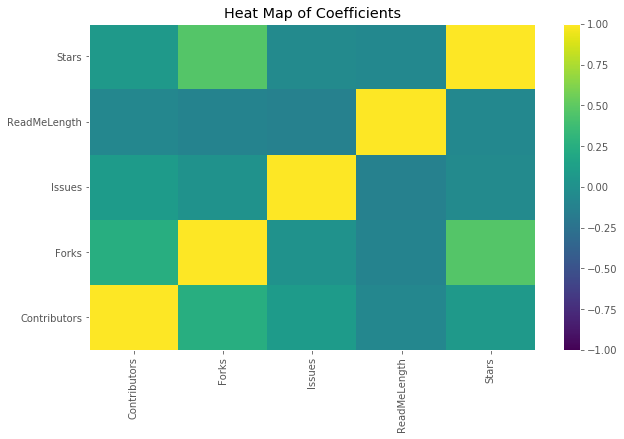

In [191]:
ind = np.arange(len(list(pi_corr))) + 0.5
labels = list(pi_corr)[1:]
plt.pcolor(pi_corr,vmin=-1,vmax=1)
plt.xticks(ind,list(pi_corr),rotation=90)
plt.yticks(ind,list(pi_corr))
plt.colorbar()
plt.title('Heat Map of Coefficients')

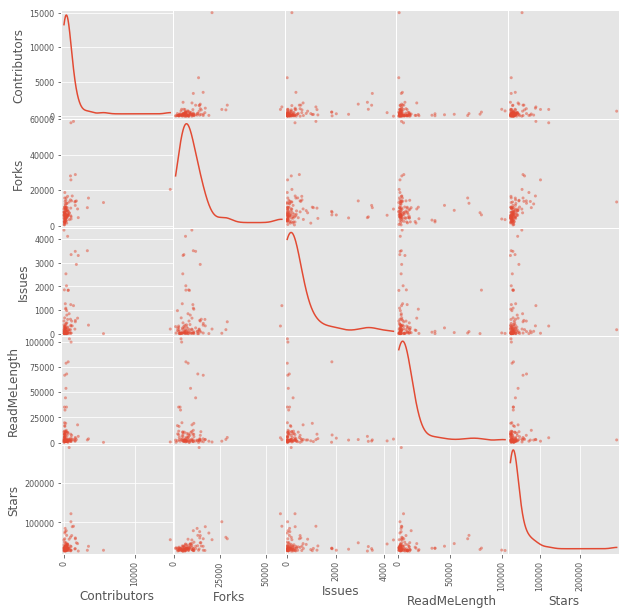

In [192]:
pd.plotting.scatter_matrix(project_info, figsize=(10, 10), diagonal='kde')
plt.show()

**Your Interpretation:** TODO

### 2.3. Linear regression

1. First use linear regression to try to predict the number of Stars based on Forks, Contributors, Issues, and Readme Length. Explain why this is not a very good model by discussing the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. 

In [199]:
# your code goes here
pi_ols = sm.ols(formula="Stars ~ Forks + Contributors + Issues + ReadMeLength", data=project_info).fit()
print('Proposed model \n',pi_ols.summary(),'\n')

pi_ols2 = sm.ols(formula="Stars ~ Forks + Issues + Forks*Issues", data=project_info).fit()
print('Improved model \n',pi_ols2.summary())

Proposed model 
                             OLS Regression Results                            
Dep. Variable:                  Stars   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     6.724
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           8.27e-05
Time:                        15:07:37   Log-Likelihood:                -1162.0
No. Observations:                 100   AIC:                             2334.
Df Residuals:                      95   BIC:                             2347.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.957e+04   4873.

** Your interpretation:** 
The first model proposed in #1 is not a very good model, which can be seen in the R-squared , F-statistic p-value, and coefficient  p-values.  At 0.221, the R-squared value is showing that the model only captures 22% of the variance in the data.  The F-statistic p-value is close to zero, which is good, but it doesn't make up for the other values in this summary.  The only good coefficient p-value is 0 for Forks, while the others have p-values above 0.5, meaning that these are not reliable or strong predictors for number of stars.

In order to develop a better model, I started by removing the terms in the first model, one by one, starting with the variable with the highest coefficient p-value (ReadMeLength).  I continued until only Forks was left and each case resulted in a lower R-squared value than the original model.

At this point, I introduced a nonlinear term (Forks x Issues) because I thought there may be a relationship between these two terms (the more forks, the more issues possibly).  With this model, I was able to get a marginally better R-squared value of 0.242, with a low F-statistic p-value.  The coefficient values for Forks and Forks:Issues are okay, but the p-value for Issues is still high (0.252).  This model is still not great, but slightly improved over the original.

To get a better model, I decided to remove two outlier repositories from the dataset (torvalds/linux which had the highest number of Contributors AND freeCodeCamp/freeCodeCamp which had the highest number of stars), which I deduced from looking at the scatterplot matrix above.  I have these steps commented in my code, but I found an r-squared value > 0.5 for the model that predicts Stars with just Forks.  In reality, I would clean the data a little more carefully to try to achieve a better model.